# Import Library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [27]:
x = np.load('./data/x.npy')
y = np.load('./data/y.npy')
pred = np.load('./data/pred.npy')
yy =pd.read_csv('./data/yy.csv',header=None)

path='./data/column_name.txt'
with open(path,'r')  as f:
    col_name=f.read() 

col_name=col_name.split('\n')

## Data Exploration

In [28]:
df_train = pd.read_csv('./data/train.csv')
try:
    del(df_train['id'])
    del(df_train['fiberID'])
except:
    pass
print(df_train.shape)
df_train.describe()

(199991, 21)


,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [ ]:
# pd.scatter_matrix(data, diagonal='kde', color='b', alpha=0.3, figsize=(20, 15))

# Explore the Data 

## From Knowledge 1

특정 조건을 선택한 경우

      COLUMN   Count     Mean      Std     Median
    psfMag_u     100  20.9838   2.0707    20.8713
    psfMag_g      70  19.8614    1.857    19.9042
    psfMag_r      65  19.2878   1.7028    19.4546
    psfMag_i      40  18.8728   1.6227     19.044
    psfMag_z      59  18.6137   1.6804     18.612
  fiberMag_u      92  21.1713   1.9591    21.0492
  fiberMag_g      41  20.0899   1.8383    20.0692
  fiberMag_r      24  19.5053   1.7045    19.6318
  fiberMag_i      23  19.0868   1.6249     19.189
  fiberMag_z      41  18.8282   1.6754    18.7111
  petroMag_u     680  20.6923   2.2623    20.3638
  petroMag_g     230  19.5978   2.0241    19.5859
  petroMag_r     171  19.0075   1.9029    19.1829
  petroMag_i     159  18.6033   1.8513    18.6933
  petroMag_z     217  18.3935   1.9865    18.1749
  modelMag_u      48  20.7309   2.1817    20.4066
  modelMag_g      30  19.5314   1.9568    19.5477
  modelMag_r      28  18.9407   1.8605    19.1433
  modelMag_i      31  18.5211   1.7

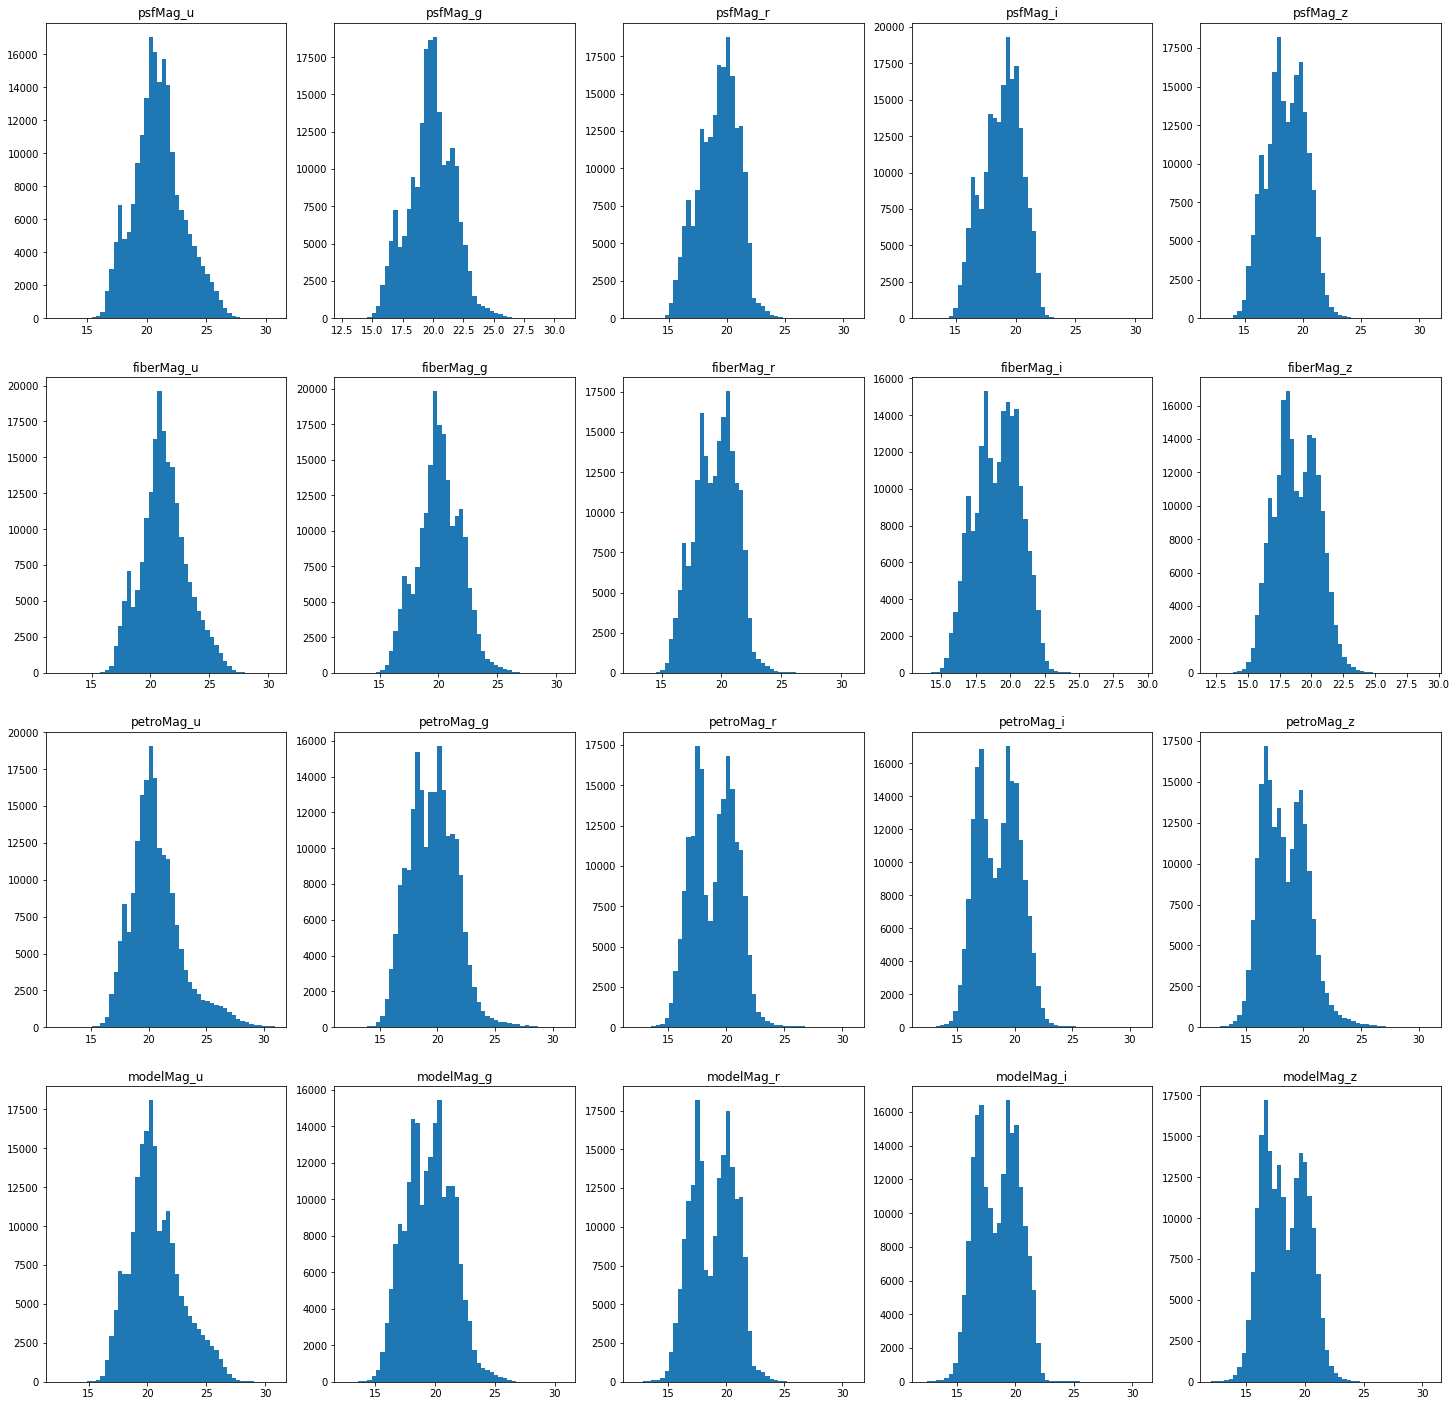

In [21]:

plt.figure(figsize=(25,25))

x1_da = x.copy()

x_max = 31
x_min = 12

for i in range(20):
    
    idx=(x1_da[:,i]> x_max) | (x1_da[:,i] < x_min)
    
    val1=len(x1_da[idx,i])
    val2=np.round(x1_da[~idx,i].mean(),4)
    val3=np.round(x1_da[~idx,i].std(),4)

    val4=np.round(np.median((x1_da[~idx,i])),4)
    
    if i ==0: 
        print("특정 조건을 선택한 경우\n")
        print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format(col_name[i],val1,val2,val3,val4))

    
    
    #######################
    #
    #   이상치 제거
    #
    x1_da[idx,i]=val4
    #
    #
    #######################
    
    plt.subplot(4,5,i+1)
    plt.hist(x1_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])
   

# print('\n'*3)
# for i in range(20):
#     xmean=np.round(x1_da[:,i].mean(),4)
#     print('{:>23}'.format(col_name[i]+' Mean value: '),xmean)

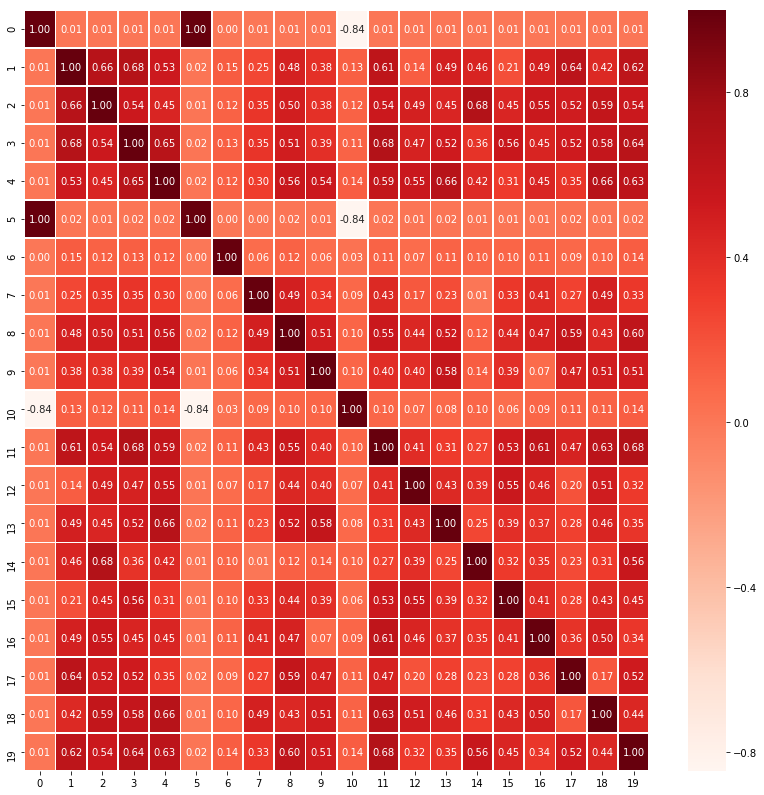

In [5]:
plt.figure(figsize=(14,14))
x1_fr=pd.DataFrame(x1_da)
sns.heatmap(data = x1_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

In [6]:
np.save('./data/x_try.npy',arr=x1_da)

## Apply StandardScaler and Delete Index and Plot

표준편차가 0.04를 기준으로 선택한 경우

      COLUMN   Count     Mean      Std     Median
    psfMag_u      21   0.0023   0.0002     0.0023
    psfMag_g    1141   0.0074   0.0117     0.0078
    psfMag_r     865   0.0068   0.0132     0.0082
    psfMag_i     332    0.007   0.0138     0.0085
    psfMag_z    1107   0.0075   0.0133     0.0075
  fiberMag_u      21   0.0025   0.0005     0.0024
  fiberMag_g      22   0.0014   0.0025     0.0013
  fiberMag_r    3597   0.0036   0.0181     0.0052
  fiberMag_i     272   0.0073   0.0132     0.0082
  fiberMag_z     219   0.0056   0.0114     0.0049
  petroMag_u     116  -0.0014    0.003    -0.0019
  petroMag_g    2656   0.0069   0.0123     0.0071
  petroMag_r    4799   0.0045   0.0183     0.0065
  petroMag_i     843   0.0061   0.0124     0.0068
  petroMag_z    2964   0.0042   0.0129      0.003
  modelMag_u    9954   0.0029   0.0153     0.0016
  modelMag_g     949   0.0059   0.0118     0.0061
  modelMag_r     758   0.0055   0.0137     0.0071
  modelMag_i     244   0.

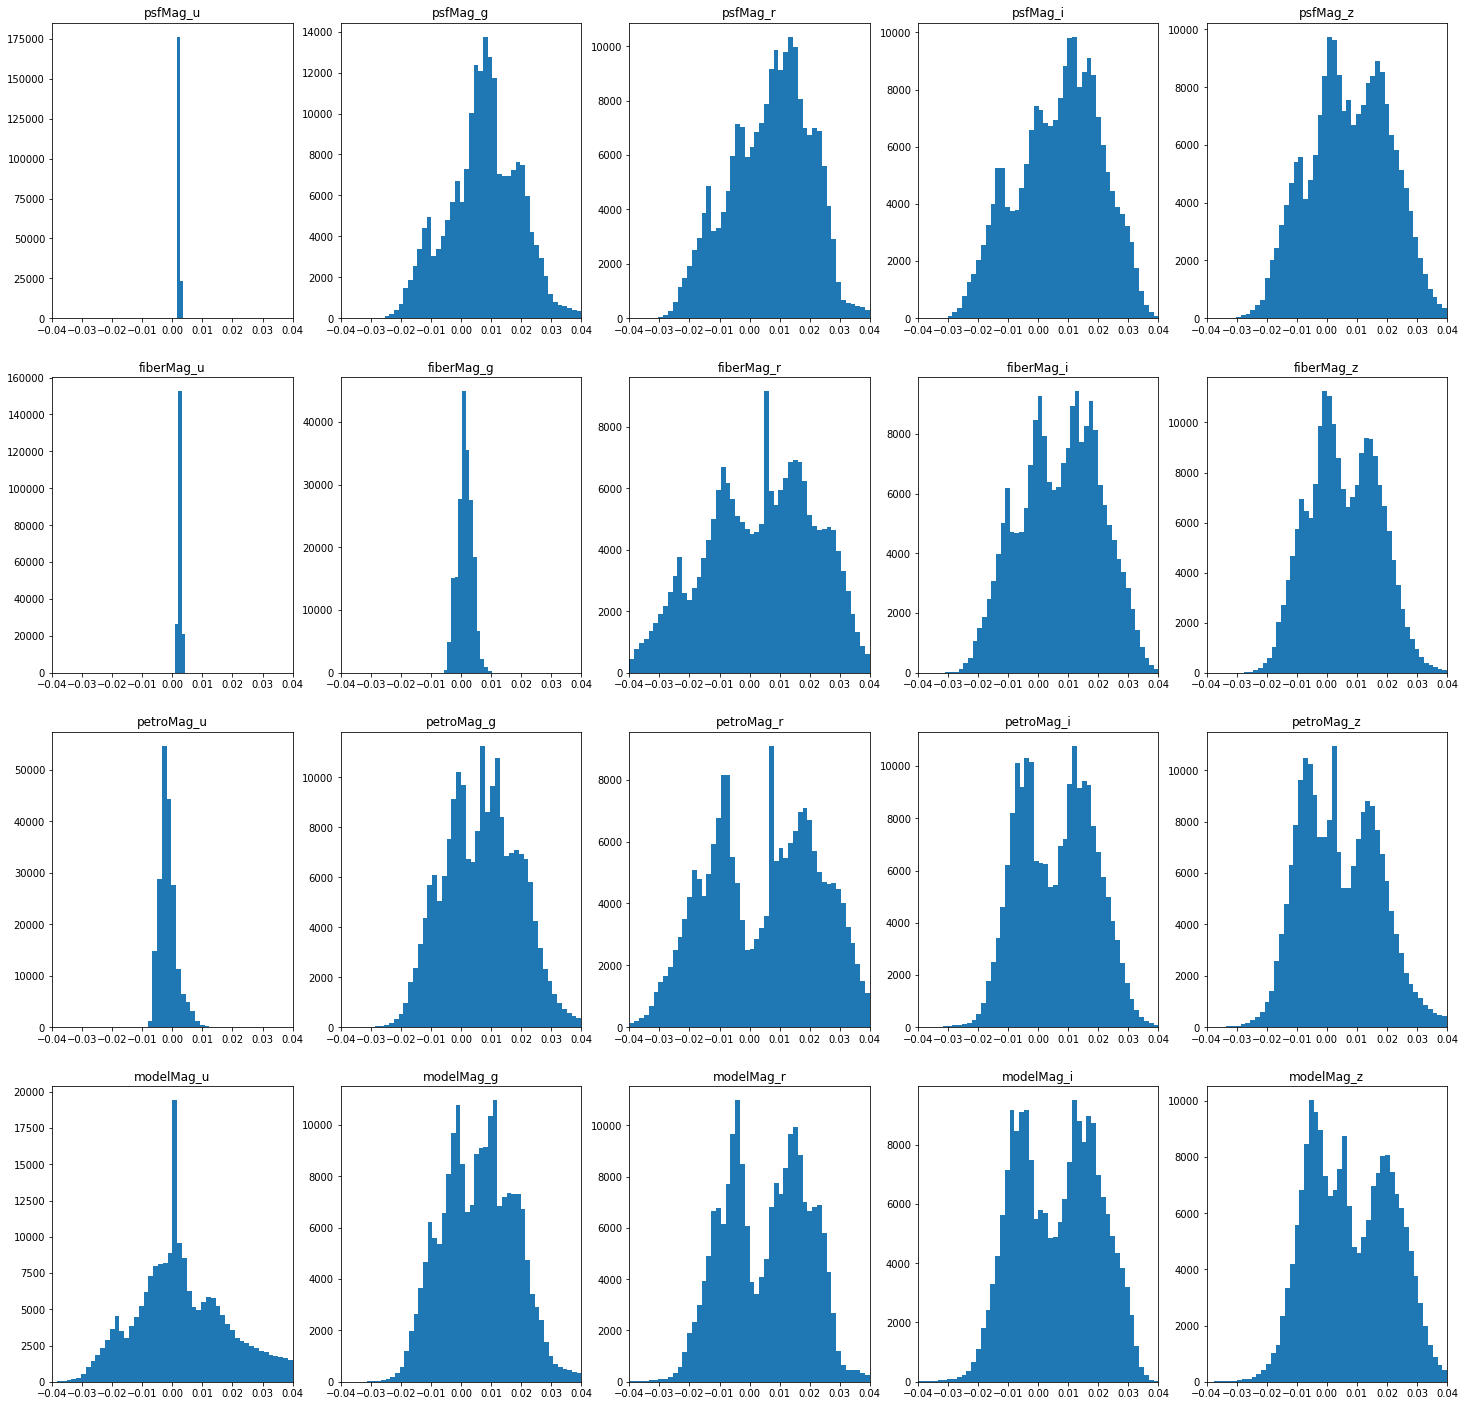

In [47]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(25,25))

scaler1 = StandardScaler()
x3_da=x.copy()
scaler1.fit(x3_da)
x3_da = scaler1.transform(x3_da)

std_ratio=0.04   ### 0.1 0.5 1.0 3.0

for i in range(0,20):

    x1 = std_ratio
    x2 = -std_ratio 

    idx= (x3_da[:,i]>x1 ) | (x3_da[:,i]<x2)     

    val1=len(x3_da[idx,i])
    val2=np.round(x3_da[~idx,i].mean(),4)
    val3=np.round(x3_da[~idx,i].std(),4)

    val4=np.round(np.median((x3_da[~idx,i])),4)
        
    if i ==0: 
        print("표준편차가 {}를 기준으로 선택한 경우\n".format(std_ratio))
        print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format(col_name[i],val1,val2,val3,val4))
   


    #######################
    #
    #   이상치 제거
    #
    x3_da[idx,i]=val4
    #
    #
    #
    #######################
    
    
    plt.subplot(4,5,i+1)
    plt.hist(x3_da[:,i],bins=50)
    #ptl.his(xu,bins=50)
    plt.gca().set_title(col_name[i])
    plt.xlim(-std_ratio,std_ratio)
    
plt.show()


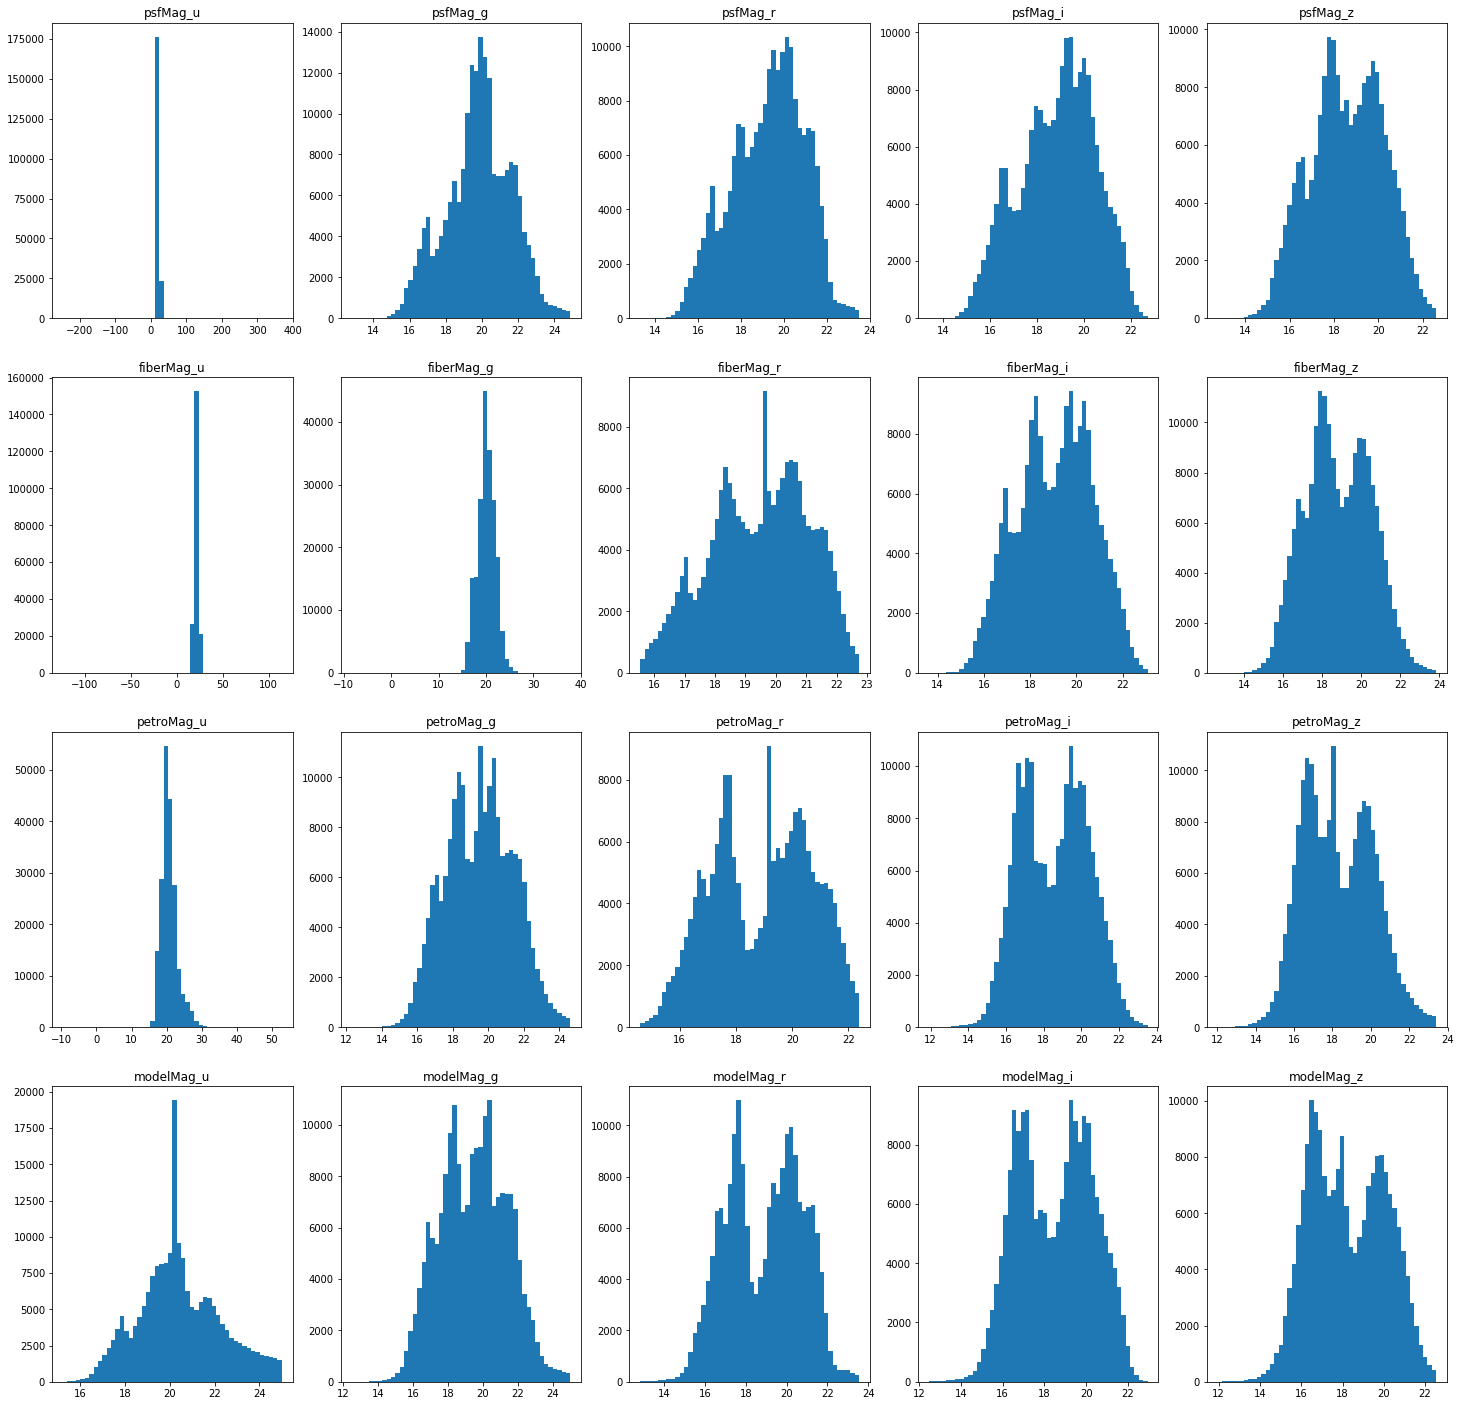

In [48]:
plt.figure(figsize=(25,25))
x3_da = scaler1.inverse_transform(x3_da)
for i in range(0,20):
    plt.subplot(4,5,i+1)
    #plt.hist(x3_da[:,i],bins=50)
    plt.hist(x3_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])
    #plt.xlim(-std_ratio,std_ratio)
    
plt.show()   


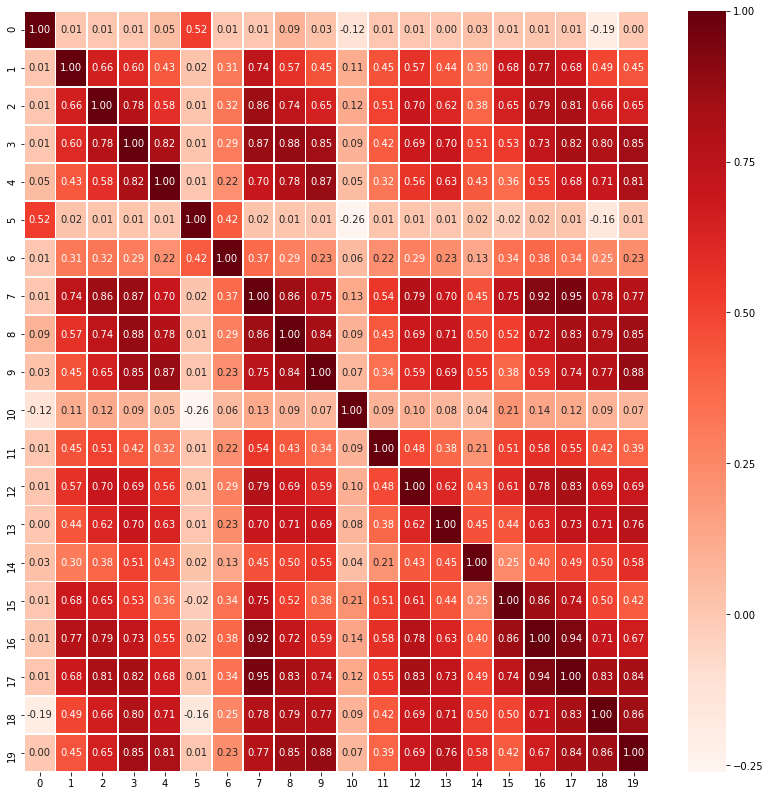

In [42]:
plt.figure(figsize=(14,14))
x3_fr=pd.DataFrame(x3_da)
sns.heatmap(data = x3_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

In [10]:
np.save('./data/x_standard.npy',arr=x3_da)

## Apply Robust and Delete Index and Plot

특정 조건을 선택한 경우

      COLUMN   Count     Mean      Std     Median
    psfMag_u     137   0.0443   0.8246    -0.0003
    psfMag_g     104  -0.0181   0.7568    -0.0001
    psfMag_r      92   -0.068   0.6888    -0.0001
    psfMag_i      78  -0.0743   0.6956    -0.0002
    psfMag_z      82   0.0002   0.6823       -0.0
  fiberMag_u     131   0.0506    0.816    -0.0001
  fiberMag_g      61   0.0082   0.7396     0.0001
  fiberMag_r      41  -0.0505   0.6771       -0.0
  fiberMag_i      25   -0.042   0.6692     0.0001
  fiberMag_z      48   0.0462   0.6626        0.0
  petroMag_u    2141   0.1041   0.8449    -0.0067
  petroMag_g     412   0.0006   0.6931    -0.0014
  petroMag_r     237  -0.0604   0.6359    -0.0004
  petroMag_i     267   -0.033   0.6177    -0.0012
  petroMag_z     396   0.0687   0.6531    -0.0014
  modelMag_u     117   0.1178   0.7981    -0.0004
  modelMag_g      45  -0.0059   0.6774       -0.0
  modelMag_r      36  -0.0681   0.6228    -0.0001
  modelMag_i      40  -0.0407   0.5

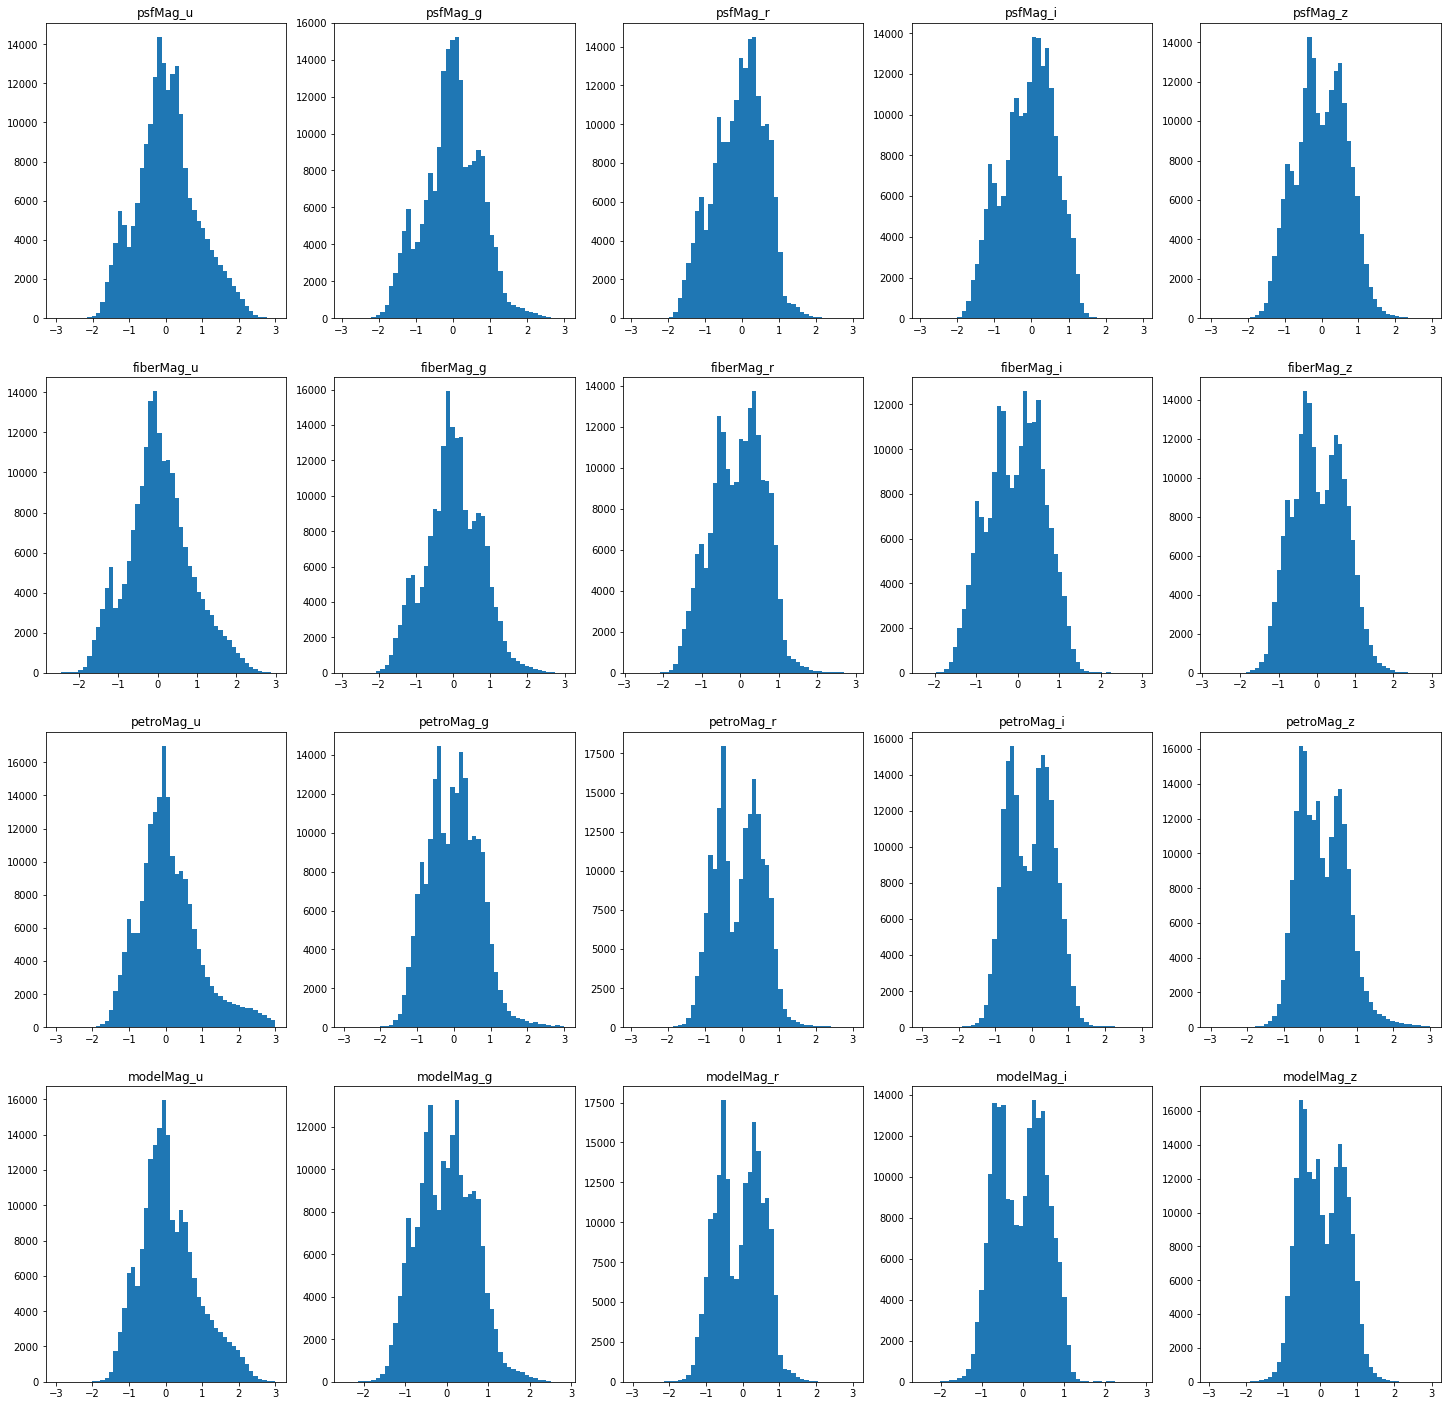

In [24]:
from sklearn.preprocessing import RobustScaler

plt.figure(figsize=(25,25))
scaler2 = RobustScaler()
x4_da=x.copy()
scaler2.fit(x4_da)
x4_da = scaler2.transform(x4_da)

x_len= 3

for i in range(0,20):
    
    x1 = x_len
    x2 = -x_len 

    idx= (x4_da[:,i]>x1 ) | (x4_da[:,i]<x2)     

    val1=len(x4_da[idx,i])
    val2=np.round(x4_da[~idx,i].mean(),4)
    val3=np.round(x4_da[~idx,i].std(),4)

    val4=np.round(np.median((x4_da[~idx,i])),4)
    
    if i ==0: 
        print("특정 조건을 선택한 경우\n")
        print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format(col_name[i],val1,val2,val3,val4))
   

    #######################
    #
    #   이상치 제거
    #
    x4_da[idx,i]=val4
    #
    #
    #######################
    
    
    plt.subplot(4,5,i+1)
    plt.hist(x4_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])
    #plt.xlim(-x,std_ratio)
    
     
plt.show()

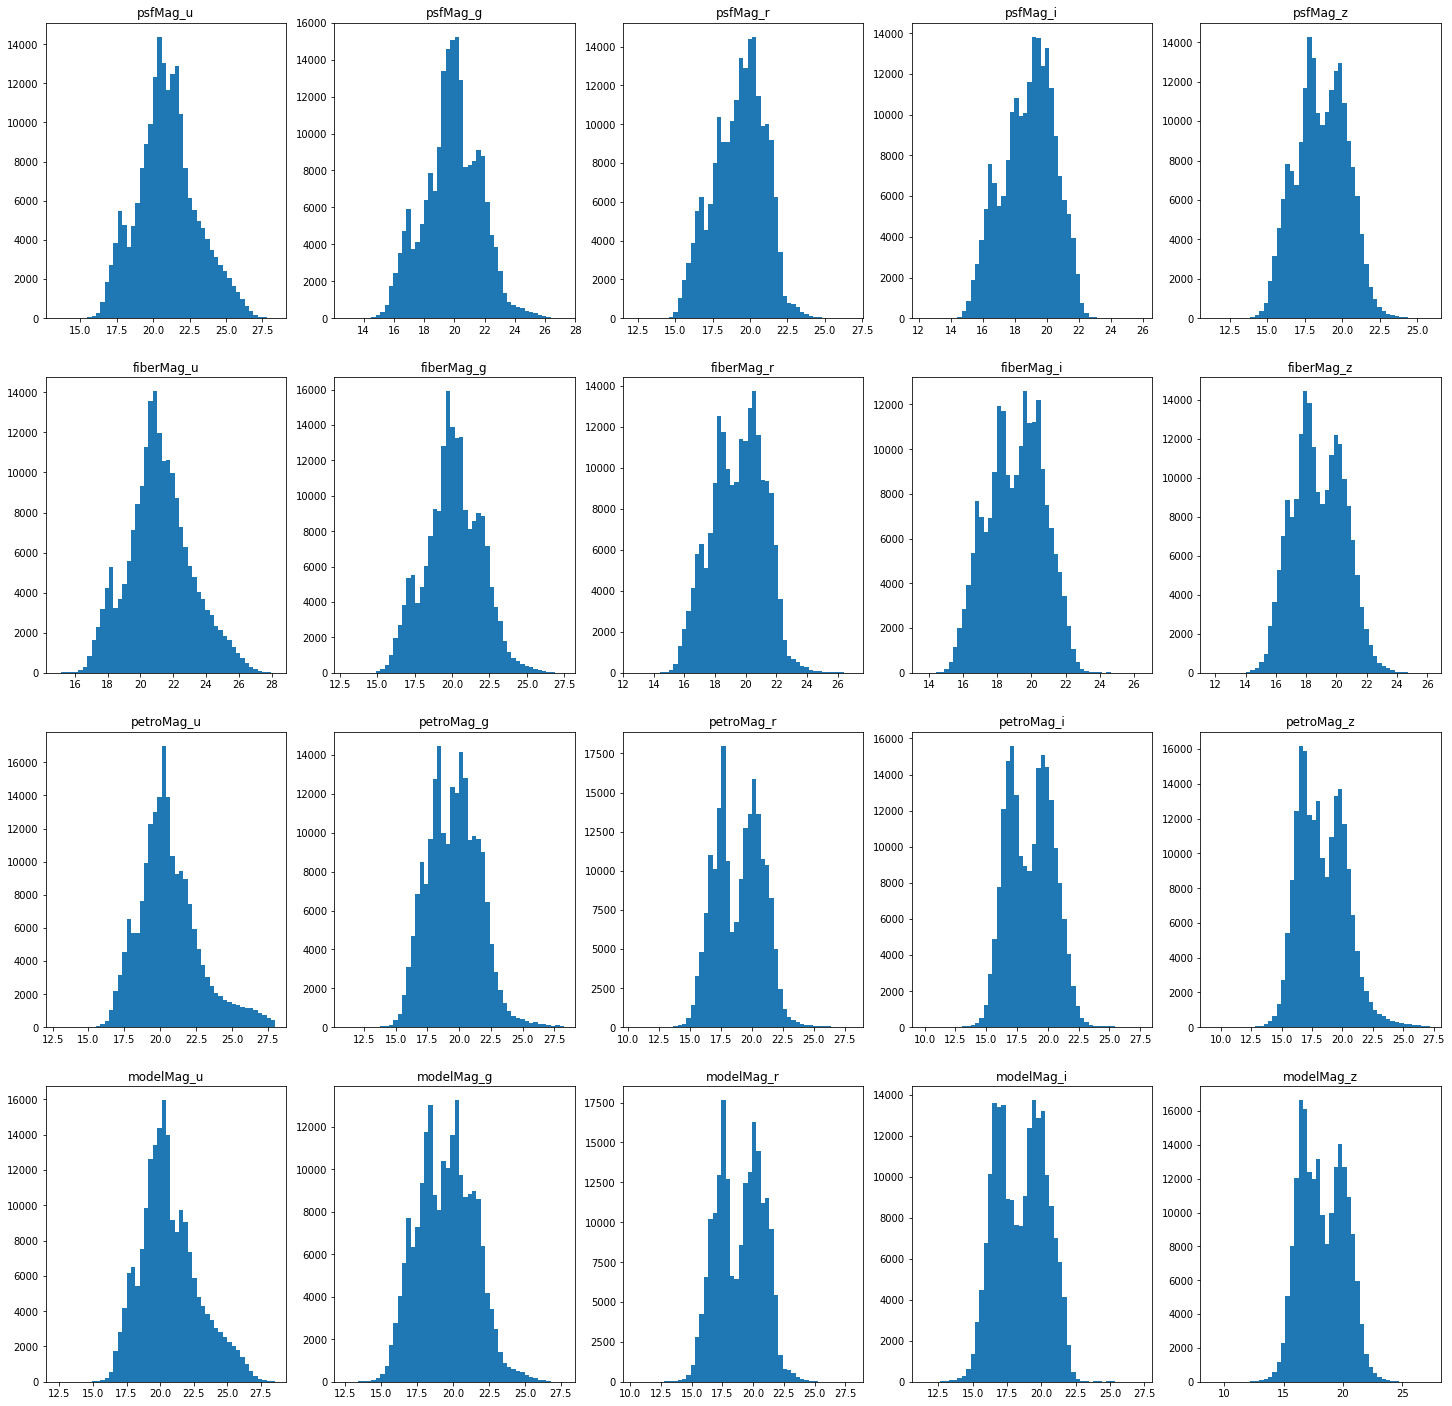

In [25]:
plt.figure(figsize=(25,25))
x4_da = scaler2.inverse_transform(x4_da)

for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.hist(x4_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])
    
plt.show()   


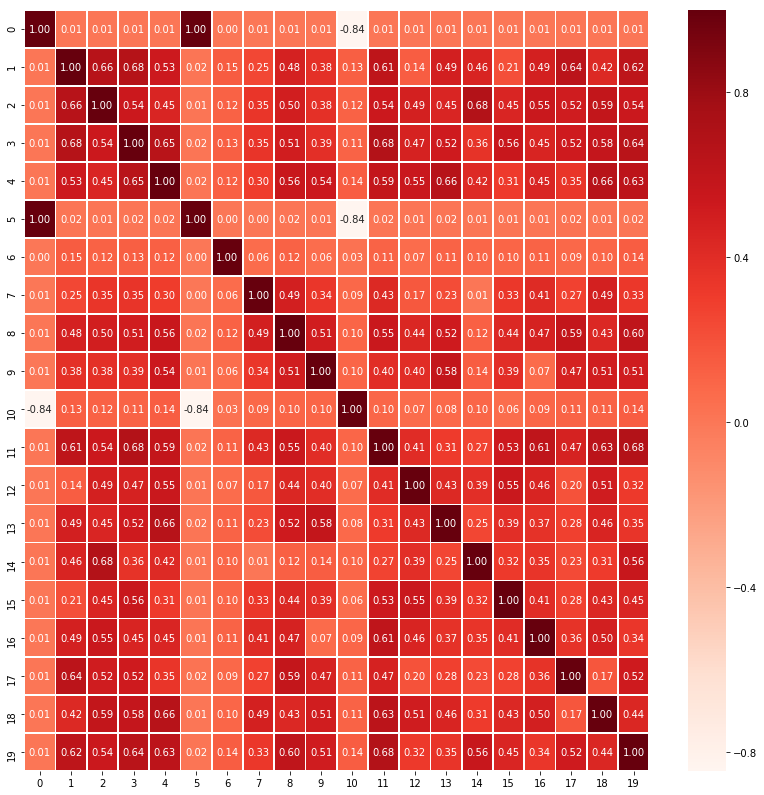

In [13]:
plt.figure(figsize=(14,14))
x4_fr=pd.DataFrame(x4_da)
sns.heatmap(data = x4_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

In [14]:
np.save('./data/x_robust.npy',arr=x4_da)

## Using Percentile and Delete Index and Plot

특정 조건을 선택한 경우

      COLUMN     Count       Mean        Std       Median
    psfMag_u       120     20.984     2.0694      20.8714
    psfMag_g       120    19.8607      1.853      19.9042
    psfMag_r       120    19.2869     1.6982      19.4545
    psfMag_i       120    18.8717     1.6161      19.0439
    psfMag_z       120    18.6124     1.6751      18.6118
  fiberMag_u       120     21.171     1.9567      21.0491
  fiberMag_g       120    20.0889     1.8333       20.069
  fiberMag_r       120    19.5044     1.6989      19.6314
  fiberMag_i       120     19.086     1.6206      19.1888
  fiberMag_z       120    18.8274     1.6712       18.711
  petroMag_u       120    20.7124     2.4035      20.3668
  petroMag_g       120    19.6011     2.0469      19.5866
  petroMag_r       120    19.0076     1.9106      19.1828
  petroMag_i       120    18.6041     1.8574      18.6934
  petroMag_z       120    18.3941     2.0031      18.1746
  modelMag_u       120     20.731     2.1771      20.4068

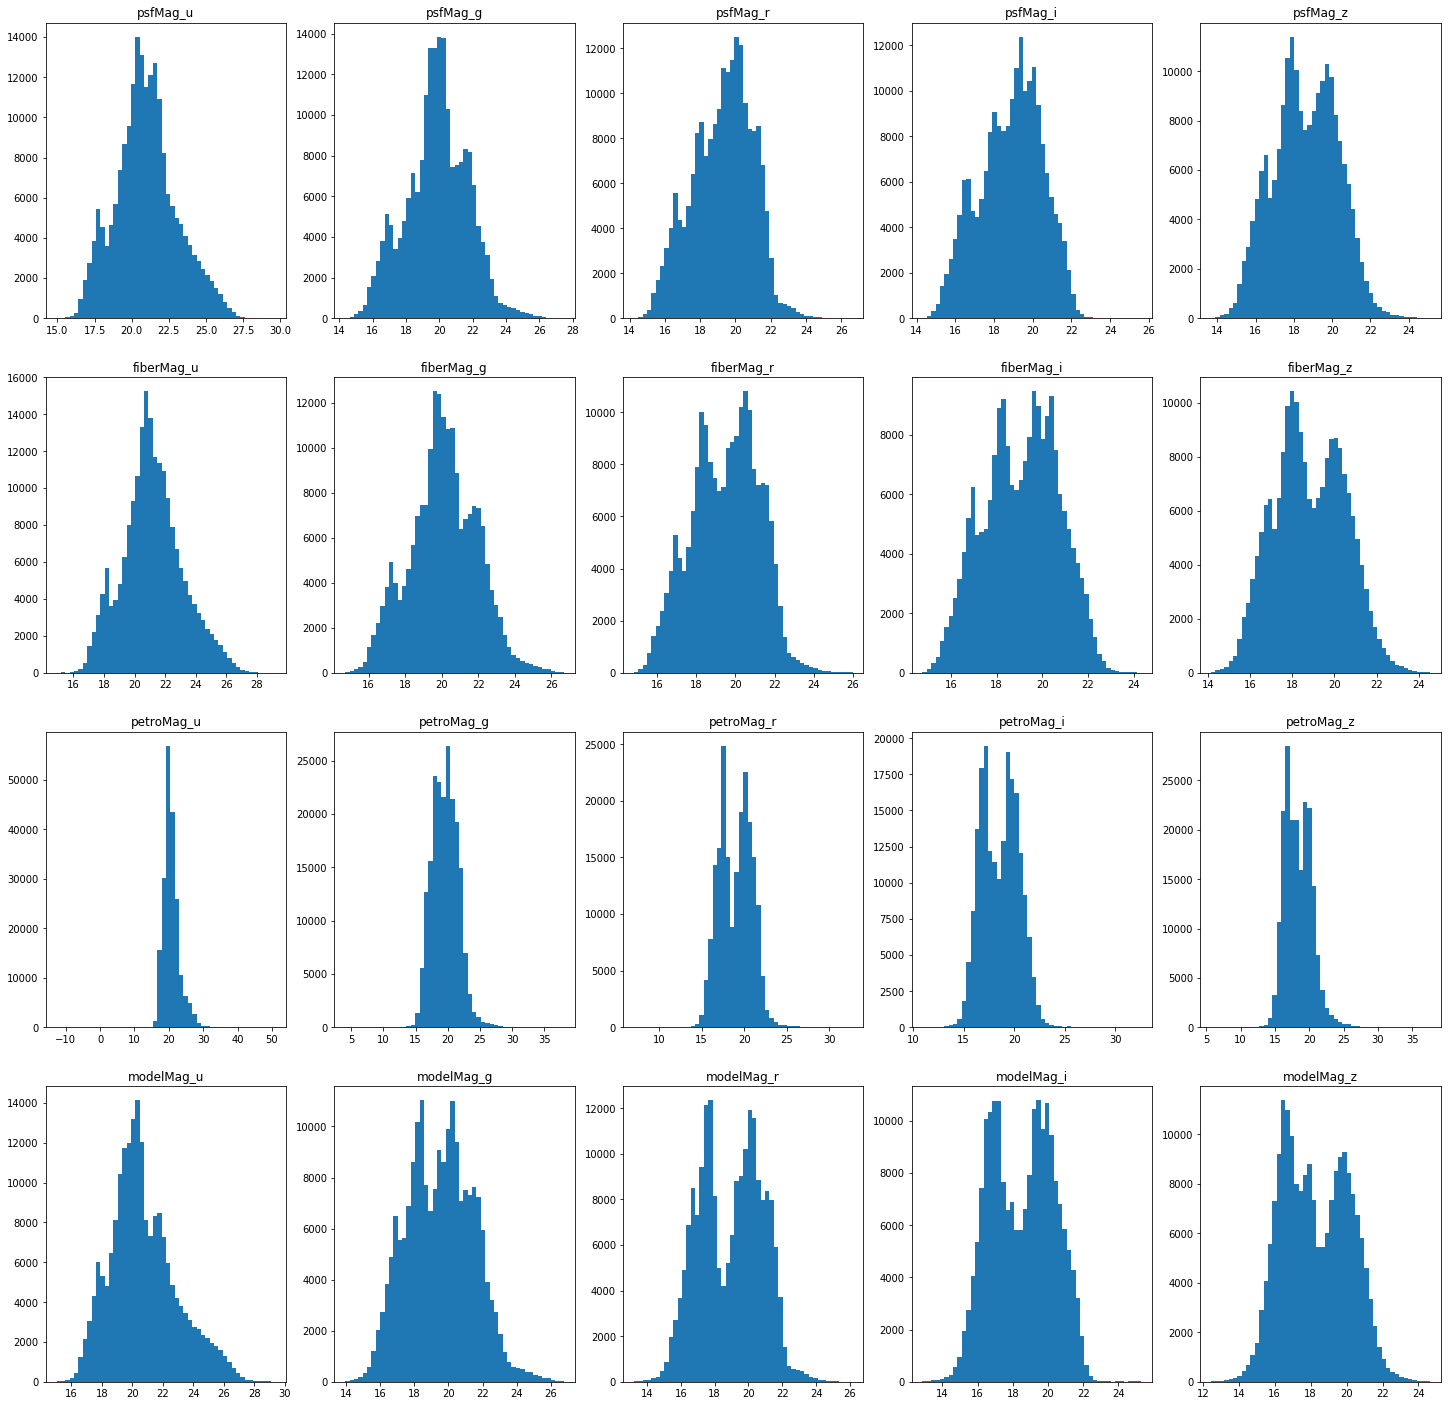

In [56]:
from sklearn.preprocessing import RobustScaler

plt.figure(figsize=(25,25))

perc=0.03
x5_da=x.copy()

for i in range(0,20):
  
    x1 = np.percentile(x5_da[:,i], perc)
    x2 = np.percentile(x5_da[:,i], 100.-perc)
    
    idx=(x5_da[:,i]>x2) | (x5_da[:,i]<x1)
    
    val1=len(x5_da[idx,i])
    val2=np.round(x5_da[~idx,i].mean(),4)
    val3=np.round(x5_da[~idx,i].std(),4)
    
    val4=np.round(np.median((x5_da[~idx,i])),4)
    
    if i ==0: 
        print("특정 조건을 선택한 경우\n")
        print('{:>12}{:>10}{:>11}{:>11}{:>13}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
    print('{:>12}{:>10}{:>11}{:>11}{:>13}'.format(col_name[i],val1,val2,val3,val4))


    #######################
    #
    #   이상치 제거
    #
    x5_da[idx,i]=val4
    #
    #
    #######################    
    
    plt.subplot(4,5,i+1)
    plt.hist(x5_da[:,i],bins=50)
    plt.gca().set_title(col_name[i])

plt.show()

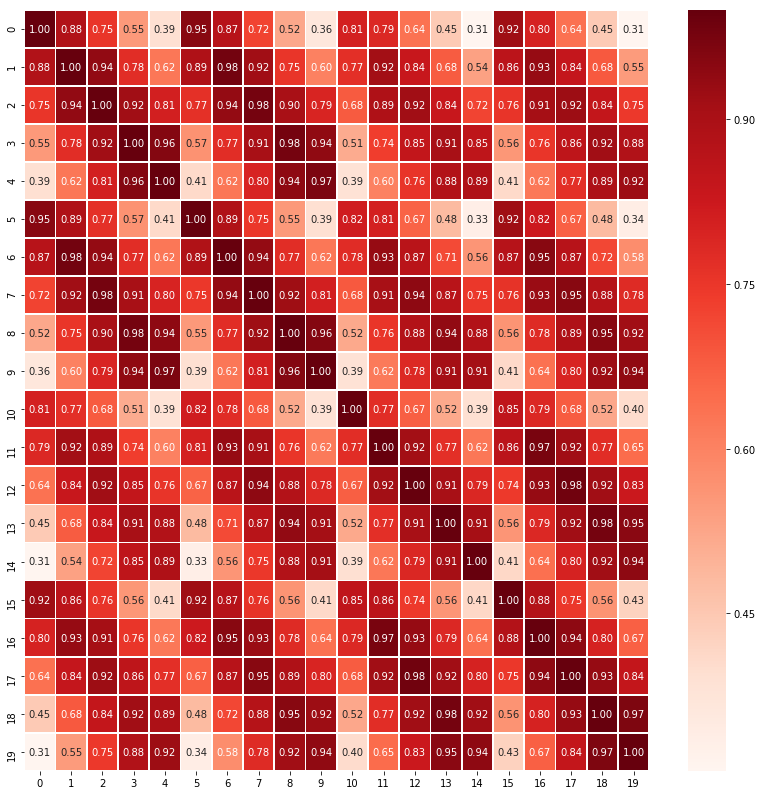

In [54]:
plt.figure(figsize=(14,14))
x5_fr=pd.DataFrame(x5_da)
sns.heatmap(data = x5_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

In [17]:
np.save('./data/x_percentile.npy',arr=x5_da)

## Using MaxAbsScaler and Delete Index and Plot

In [18]:
# from sklearn.preprocessing import QuantileTransformer

# plt.figure(figsize=(25,25))
# scaler2 = QuantileTransformer()
# x6_da=x.copy()
# scaler2.fit(x6_da)
# x6_da = scaler2.transform(x6_da)

# #x_len= 

# for i in range(0,20):
    
#     x1 = 0.95 #x_len
#     x2 = 0.05 #-x_len 

#     idx= (x6_da[:,i]>x1 ) | (x6_da[:,i]<x2)     

#     val1=len(x6_da[idx,i])
#     val2=np.round(x6_da[~idx,i].mean(),4)
#     val3=np.round(x6_da[~idx,i].std(),4)

#     val4=np.round(np.median((x6_da[~idx,i])),4)
    
#     if i ==0: 
#         print("특정 조건을 선택한 경우\n")
#         print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format('COLUMN','Count','  Mean', 'Std', 'Median'))
#     print('{:>12}{:>8}{:>9}{:>9}{:>11}'.format(col_name[i],val1,val2,val3,val4))
   

#     #######################
#     #
#     #   이상치 제거
#     #
#     # x6_da[idx,i]=val4
#     #
#     #
#     #######################
    
    
#     plt.subplot(4,5,i+1)
#     plt.hist(x6_da[:,i],bins=50)
#     plt.gca().set_title(col_name[i])
#     #plt.xlim(-x,std_ratio)
    
     
# plt.show()

In [19]:
# plt.figure(figsize=(14,14))
# x6_fr=pd.DataFrame(x6_da)
# sns.heatmap(data = x6_fr.corr(), annot=True, fmt = '.2f', linewidths=.8, cmap='Reds')

In [20]:
# np.save('./data/x_quantile.npy',arr=x6_da)